In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
pip install yfinance

     -------------------------------------- 73.5/73.5 kB 811.4 kB/s eta 0:00:00
     ---------------------------------------- 63.7/63.7 kB 1.7 MB/s eta 0:00:00
     ---------------------------------------- 3.0/3.0 MB 1.5 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ------------------------------------ 112.2/112.2 kB 296.3 kB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.5-py3-none-any.whl size=138681 sha256=8e0339684c30ea52775115819567997ba75e4440e08b063ddef35d60175dd454
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\e2\53\cd\01e683140f777fc841bcb4ced360a727a4ea3109fb4fc69c0d
Successfully built peewee
  Attempting uninstall: requests
    Found exi

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.41 requires requests_mock, which is not installed.
conda-repo-cli 1.0.41 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.41 requires nbformat==5.4.0, but you have nbformat 5.7.0 which is incompatible.
conda-repo-cli 1.0.41 requires requests==2.28.1, but you have requests 2.32.1 which is incompatible.


In [4]:
start = '2014-04-01'
end = '2024-03-31'

stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [5]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-04-01,27.859013,28.344681,27.859013,28.280355,28.280355,158434
2014-04-02,29.917362,30.158699,28.032537,28.272379,28.272379,2942055
2014-04-03,28.414488,29.283602,28.129271,28.409002,28.409002,101983228
2014-04-04,28.653831,28.809404,27.075665,27.082645,27.082645,127386783
2014-04-07,26.962973,27.348913,26.285334,26.833828,26.833828,88033033
...,...,...,...,...,...,...
2024-03-22,150.240005,152.559998,150.089996,151.770004,151.770004,19226300
2024-03-25,150.949997,151.455994,148.800003,151.149994,151.149994,15114700
2024-03-26,151.240005,153.199997,151.029999,151.699997,151.699997,19312700


In [6]:
data.reset_index(inplace=True)

In [7]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-04-01,27.859013,28.344681,27.859013,28.280355,28.280355,158434
1,2014-04-02,29.917362,30.158699,28.032537,28.272379,28.272379,2942055
2,2014-04-03,28.414488,29.283602,28.129271,28.409002,28.409002,101983228
3,2014-04-04,28.653831,28.809404,27.075665,27.082645,27.082645,127386783
4,2014-04-07,26.962973,27.348913,26.285334,26.833828,26.833828,88033033
...,...,...,...,...,...,...,...
2511,2024-03-22,150.240005,152.559998,150.089996,151.770004,151.770004,19226300
2512,2024-03-25,150.949997,151.455994,148.800003,151.149994,151.149994,15114700
2513,2024-03-26,151.240005,153.199997,151.029999,151.699997,151.699997,19312700
2514,2024-03-27,152.145004,152.690002,150.130005,151.940002,151.940002,16622000


In [8]:
ma_100_days = data.Close.rolling(100).mean()

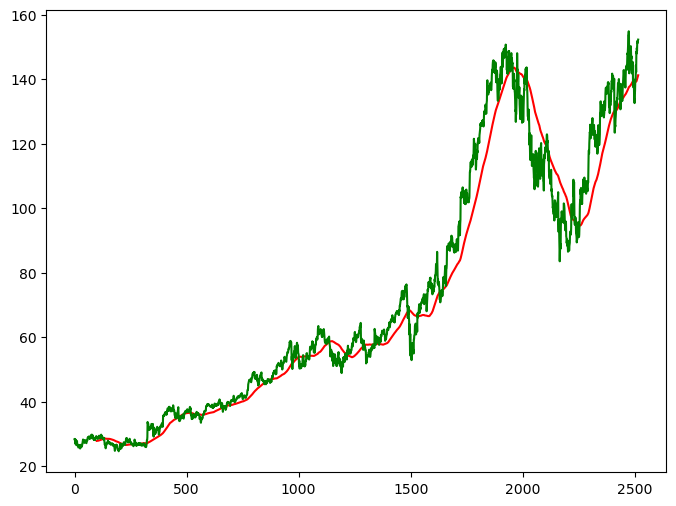

In [9]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [10]:
ma_200_days = data.Close.rolling(200).mean()

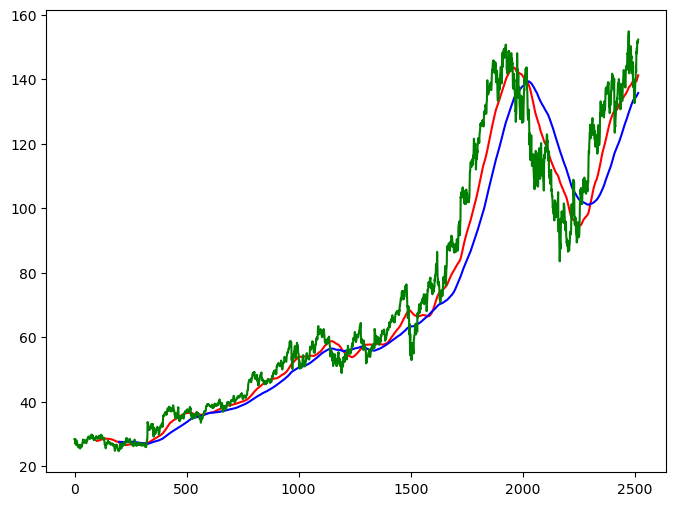

In [11]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Close, 'g')
plt.show()

In [13]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [22]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [106]:
data_train.shape[0]

2012

In [107]:
data_test.shape[0]

704

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [108]:
data_train_scale = scaler.fit_transform(data_train)

In [110]:
x = []
y = []
for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [111]:
x, y = np.array(x), np.array(y)

In [112]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [113]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

In [114]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [115]:
model.fit(x, y, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
60/60 [==============================] - 21s 238ms/step - loss: 0.0307
Epoch 2/50
60/60 [==============================] - 14s 236ms/step - loss: 0.0055
Epoch 3/50
60/60 [==============================] - 14s 226ms/step - loss: 0.0055
Epoch 4/50
60/60 [==============================] - 13s 222ms/step - loss: 0.0050
Epoch 5/50
60/60 [==============================] - 14s 235ms/step - loss: 0.0052
Epoch 6/50
60/60 [==============================] - 12s 206ms/step - loss: 0.0041
Epoch 7/50
60/60 [==============================] - 12s 201ms/step - loss: 0.0043
Epoch 8/50
60/60 [==============================] - 12s 201ms/step - loss: 0.0037
Epoch 9/50
60/60 [==============================] - 12s 200ms/step - loss: 0.0038
Epoch 10/50
60/60 [==============================] - 12s 202ms/step - loss: 0.0038
Epoch 11/50
60/60 [==============================] - 13s 209ms/step - loss: 0.0035
Epoch 12/50
60/60 [==============================] - 12s 204ms/step - loss: 0.0044
Epoch 13/50
6

In [116]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_7 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_8 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_9 (LSTM)               (None, 120)              

In [117]:
pas_100_days = data_train.tail(100)

In [118]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [120]:
data_test_scale = scaler.fit_transform(data_test)

In [121]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [122]:
y_predict = model.predict(x)

22/22 [==============================] - 2s 48ms/step


In [124]:
scale = 1/scaler.scale_

In [125]:
y_predict = y_predict*scale

In [126]:
y = y*scale

In [127]:
y.shape

(704,)

In [128]:
y_predict.shape

(704, 1)

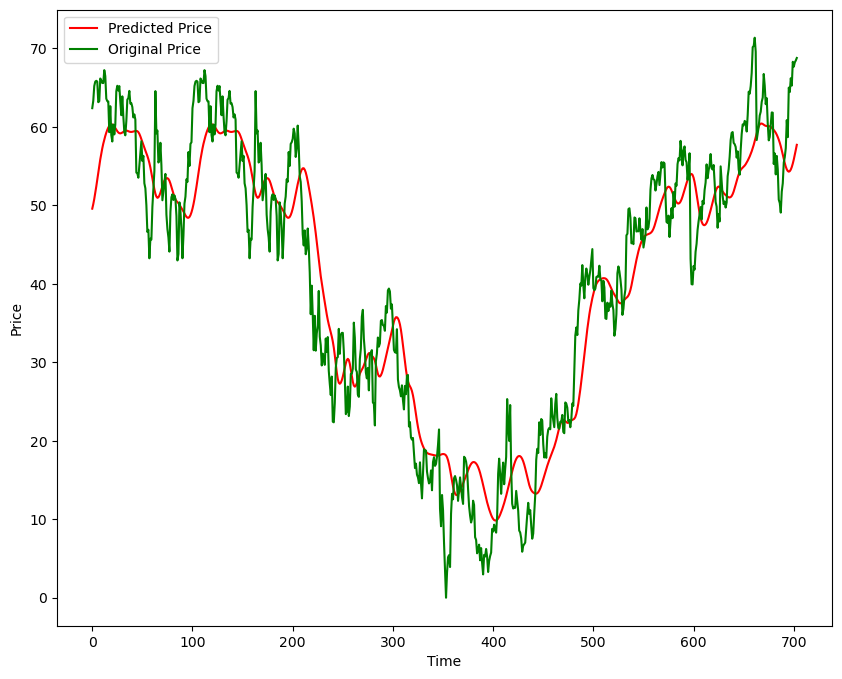

In [129]:
plt.figure(figsize=(10, 8))
plt.plot(y_predict, 'r', label='Predicted Price')
plt.plot(y, 'g', label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [130]:
model.save('Stock Predictions Model.keras')